In [61]:
#1.导入库
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import rcParams, font_manager

# 一次性设置全局中文字体（宋体）
font_path = '/System/Library/Fonts/Supplemental/Songti.ttc'
rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()

# 可选：解决负号乱码（常见于坐标轴）
rcParams['axes.unicode_minus'] = False

#2.导入数据
df = pd.read_csv('data/house_sales(1).csv')

#3.数据概览
print("总记录数", len(df))
print('字段数量',len(df.columns))


#4.数据清洗
#删除无用的列
df.drop(columns='origin_url', inplace=True)#原地删除
df.head()

#检查缺失值
df.isna().sum()
#删除有缺失值的数据
df.dropna(inplace=True)

总记录数 106118
字段数量 12


In [64]:
#检查缺失值
df.isna().sum()

city        0
address     0
area        0
floor       0
name        0
price       0
province    0
rooms       0
toward      0
unit        0
year        0
dtype: int64

In [13]:
#检查是否有重复值
df.duplicated().sum()
#删除重复数据
df.drop_duplicates(inplace=True)

In [15]:
#检查是否有重复值
df.duplicated().sum()  #没重复值了

0

In [67]:
#处理面积
df['area'] = df['area'].str.replace('㎡', '').astype(float)
df.head()

AttributeError: Can only use .str accessor with string values!

In [73]:
#处理售价的类型转换
df['price'] = df['price'].str.replace('万', '').astype(float)
df.head()

AttributeError: Can only use .str accessor with string values!

In [74]:
#朝向的数据类型转换，转成category
df['toward'] = df['toward'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57520 entries, 0 to 106089
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   city      57520 non-null  object  
 1   address   57520 non-null  object  
 2   area      57520 non-null  float64 
 3   floor     57520 non-null  object  
 4   name      57520 non-null  object  
 5   price     57520 non-null  float64 
 6   province  57520 non-null  object  
 7   rooms     57520 non-null  object  
 8   toward    57520 non-null  category
 9   unit      57520 non-null  object  
 10  year      57520 non-null  object  
dtypes: category(1), float64(2), object(8)
memory usage: 4.9+ MB


In [75]:
#每平米数据转换
df['unit'] = df['unit'].str.replace('元/㎡', '').astype(float)
df.head()

,city,address,area,floor,name,price,province,rooms,toward,unit,year
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90.0,中层（共18层）,圣地亚哥,128.0,安徽,3室2厅,南北向,14222.0,2013年建
1,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90.0,中层（共18层）,圣地亚哥,128.0,安徽,3室2厅,南北向,14222.0,2013年建
2,合肥,生态公园-淮海大道与大众路交口,95.0,中层（共18层）,正荣·悦都荟,132.0,安徽,3室2厅,南向,13895.0,2019年建
3,合肥,生态公园-淮海大道与大众路交口,95.0,中层（共18层）,正荣·悦都荟,132.0,安徽,3室2厅,南向,13895.0,2019年建
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37.0,中层（共22层）,文一名门金隅,32.0,安徽,2室1厅,南北向,8649.0,2017年建


In [76]:
#年份转换
df['year'] = df['year'].str.replace('年建', '').astype(int)
df.head()

,city,address,area,floor,name,price,province,rooms,toward,unit,year
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90.0,中层（共18层）,圣地亚哥,128.0,安徽,3室2厅,南北向,14222.0,2013
1,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90.0,中层（共18层）,圣地亚哥,128.0,安徽,3室2厅,南北向,14222.0,2013
2,合肥,生态公园-淮海大道与大众路交口,95.0,中层（共18层）,正荣·悦都荟,132.0,安徽,3室2厅,南向,13895.0,2019
3,合肥,生态公园-淮海大道与大众路交口,95.0,中层（共18层）,正荣·悦都荟,132.0,安徽,3室2厅,南向,13895.0,2019
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37.0,中层（共22层）,文一名门金隅,32.0,安徽,2室1厅,南北向,8649.0,2017


In [77]:
#异常值的处理
#房屋面积的异常处理
df = df[(df['area'] < 20) | (df['area'] > 600)]  #必须用小括号括起来

In [81]:
#房屋售价的异常值处理
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
low_price = Q1 - 1.5*IQR
high_price = Q3 + 1.5 * IQR
df = df[(df['price'] < high_price) & (df['price'] > low_price)]

In [94]:
#5.新数据特征构造
#地区district
df['district'] = df['address'].str.split('-').str[0]
#楼层的类型floor_type
df['floor_type'] = df['floor'].str.split('（').str[0]
def fun1(str1):
    if pd.isna(str1):
        return '未知'
    elif '低' in str1:
        return '低楼层'
    elif '中' in str1:
        return '中楼层'
    elif '高' in str1:
        return '高楼层'
    else:
        return '未知'
df['floor_type2'] = df['floor'].apply(fun1)
df

,city,address,area,floor,name,price,province,rooms,toward,unit,year,district,floor_type,floor_type2
102,合肥,新省府-包河大道与南京路交口,11.00,中层（共27层）,招商·雍华府,22.0,安徽,2室1厅,南向,20000.0,2018,新省府,中层,中楼层
103,合肥,新省府-包河大道与南京路交口,11.00,中层（共27层）,招商·雍华府,22.0,安徽,2室1厅,南向,20000.0,2018,新省府,中层,中楼层
980,天津,体育馆街-成都道与桂林路交口,11.86,高层（共1层）,成都道小区,140.0,直辖市,1室0厅,东向,118044.0,1998,体育馆街,高层,高楼层
981,天津,体育馆街-成都道与桂林路交口,11.86,高层（共1层）,成都道小区,140.0,直辖市,1室0厅,东向,118044.0,1998,体育馆街,高层,高楼层
5854,衡水,衡百国际-胜利路与宝云街交叉口德隆超市对面,990.00,中层（共24层）,橄榄城,77.0,河北,2室2厅,南向,778.0,2010,衡百国际,中层,中楼层
5855,衡水,衡百国际-胜利路与宝云街交叉口德隆超市对面,990.00,中层（共24层）,橄榄城,77.0,河北,2室2厅,南向,778.0,2010,衡百国际,中层,中楼层
6366,杭州,北干-天汇园星云地带新区金城路金鸡路交叉处,17.00,中层（共28层）,天汇园星云地带,50.0,浙江,2室2厅,南向,29412.0,2016,北干,中层,中楼层
6367,杭州,北干-天汇园星云地带新区金城路金鸡路交叉处,17.00,中层（共28层）,天汇园星云地带,50.0,浙江,2室2厅,南向,29412.0,2016,北干,中层,中楼层
6834,邯郸,丛台-油漆厂路16号,2019.00,中层（共30层）,恒大翡翠御庭,113.0,河北,3室2厅,南北向,560.0,2019,丛台,中层,中楼层
6835,邯郸,丛台-油漆厂路16号,2019.00,中层（共30层）,恒大翡翠御庭,113.0,河北,3室2厅,南北向,560.0,2019,丛台,中层,中楼层


In [102]:
#是否是直辖市 zxs
def fun2(str2):
    if str2 in ['北京','上海','天津','重庆']:
        return True
    else:
        return False
df['zxs'] = df['city'].apply(fun2)

In [105]:
#卧室数量bedrooms
df['rooms'] = df['rooms'].str.split('室').str[0].astype(int)
df

AttributeError: Can only use .str accessor with string values!

<AxesSubplot:>

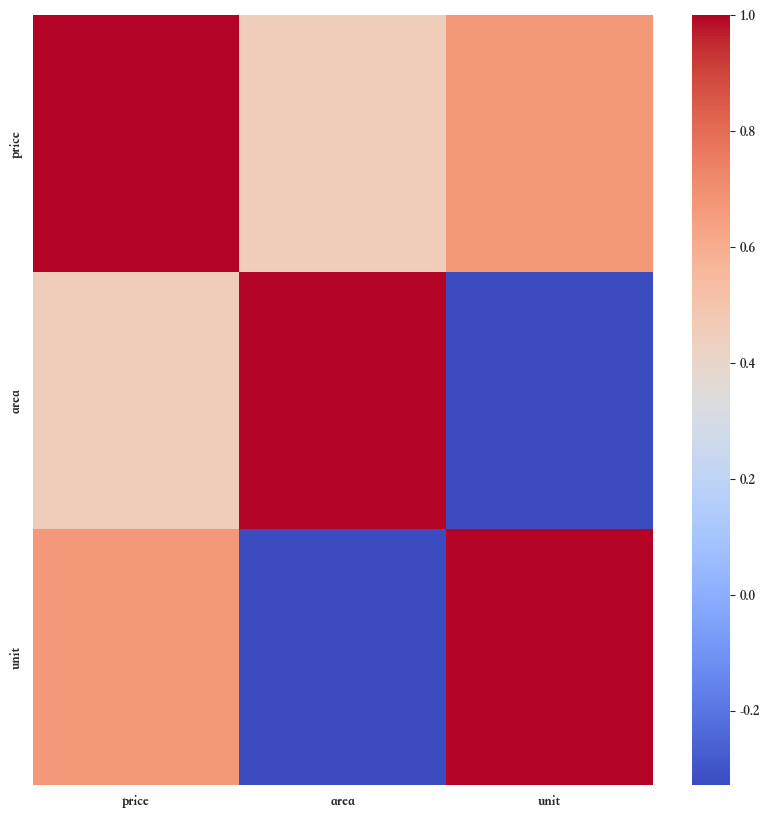

In [115]:
#6.问题分析以及可视化
#选择数值型特征
a = df[['price', 'area', 'unit']].corr()
#对房价影响最大的因素
a['price'].sort_values(ascending=False)[1:]
#相关性的热力图
plt.figure(figsize=(10, 10))
sns.heatmap(a, cmap='coolwarm')

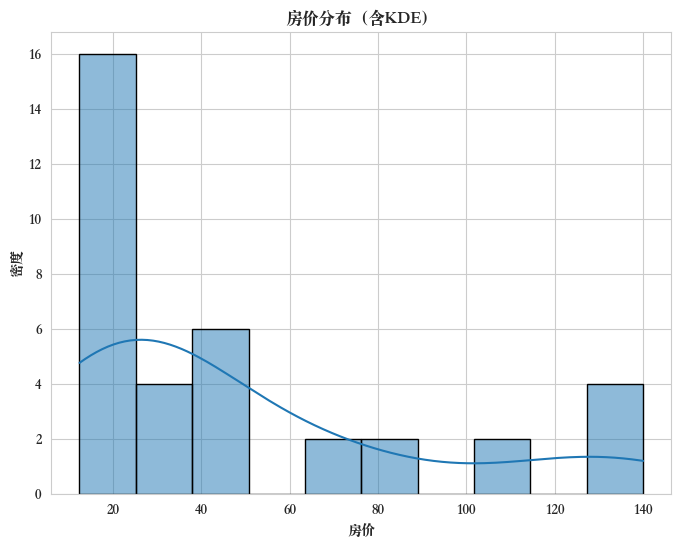

In [122]:
#房价分部的直方图
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=10, kde=True, edgecolor='black')
plt.title("房价分布（含KDE）")
plt.xlabel("房价")
plt.ylabel("密度")
plt.grid(True)
plt.show()